Pseudo labelling and splitting data by angle

In [121]:
%load_ext autoreload
%autoreload 2

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pdb
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras import backend as K
from matplotlib import pyplot as plt
%matplotlib inline
import scipy
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom
from scipy.ndimage import imread
import helpers
from models import DaveModel, DaveVGG, DaveVGG19, SimpleModel


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
train = pd.read_json("_RawData/train.json/data/processed/train.json")
test = pd.read_json("_RawData/test.json/data/processed/test.json")

In [11]:
X = helpers.get_images(train)

In [12]:
y = to_categorical(train.is_iceberg.values,num_classes=2)

In [13]:
Xtr, Xv, ytr, yv = train_test_split(X, y, shuffle=False, test_size=0.20)

In [32]:
# Create the model and compile
model = DaveModel(Xtr, ytr, Xv, yv)

In [33]:
model.train(32, 10)

Batch Size: 32
Epochs: 10
Epoch 1/10
41/40 [==============================] - 3s - loss: 0.5740 - acc: 0.6958 - val_loss: 0.6543 - val_acc: 0.6573
Epoch 2/10
41/40 [==============================] - 1s - loss: 0.4822 - acc: 0.7529 - val_loss: 0.6414 - val_acc: 0.6573
Epoch 3/10
41/40 [==============================] - 1s - loss: 0.4507 - acc: 0.7732 - val_loss: 0.6603 - val_acc: 0.6573
Epoch 4/10
41/40 [==============================] - 1s - loss: 0.4206 - acc: 0.7941 - val_loss: 0.7224 - val_acc: 0.6573
Epoch 5/10
41/40 [==============================] - 1s - loss: 0.3985 - acc: 0.8025 - val_loss: 0.8164 - val_acc: 0.6573
Epoch 6/10
41/40 [==============================] - 1s - loss: 0.3969 - acc: 0.8105 - val_loss: 0.8896 - val_acc: 0.6573
Epoch 7/10
41/40 [==============================] - 1s - loss: 0.3682 - acc: 0.8205 - val_loss: 0.9699 - val_acc: 0.6573
Epoch 8/10
41/40 [==============================] - 1s - loss: 0.3404 - acc: 0.8452 - val_loss: 1.1193 - val_acc: 0.6573
Epoch 

In [124]:
vgg = DaveVGG(Xtr, ytr, Xv, yv)

In [126]:
vgg.train(32, 30, True)

Batch Size: 32
Epochs: 30
Epoch 1/30
41/40 [==============================] - 6s - loss: 0.3420 - acc: 0.8498 - val_loss: 0.3445 - val_acc: 0.8411
Epoch 2/30
41/40 [==============================] - 5s - loss: 0.3286 - acc: 0.8452 - val_loss: 0.3944 - val_acc: 0.8287
Epoch 3/30
41/40 [==============================] - 5s - loss: 0.3367 - acc: 0.8437 - val_loss: 0.3988 - val_acc: 0.7788
Epoch 4/30
41/40 [==============================] - 5s - loss: 0.3498 - acc: 0.8388 - val_loss: 0.3956 - val_acc: 0.8629
Epoch 5/30
41/40 [==============================] - 5s - loss: 0.3293 - acc: 0.8559 - val_loss: 0.3464 - val_acc: 0.8224
Epoch 6/30
41/40 [==============================] - 5s - loss: 0.3272 - acc: 0.8502 - val_loss: 0.3762 - val_acc: 0.8069
Epoch 7/30
41/40 [==============================] - 5s - loss: 0.3199 - acc: 0.8456 - val_loss: 0.3523 - val_acc: 0.8660
Epoch 8/30
41/40 [==============================] - 5s - loss: 0.3450 - acc: 0.8380 - val_loss: 0.3433 - val_acc: 0.8910
Epoch 

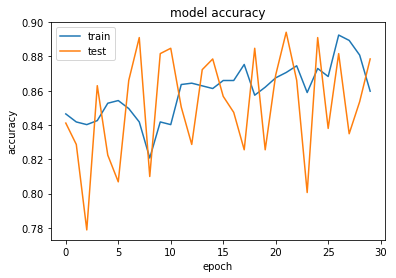

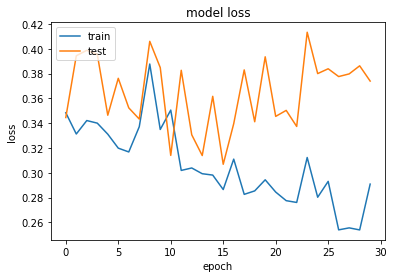

In [127]:
vgg.plot_results()

In [128]:
X_test = helpers.get_images(test)
predict = vgg.predict(X_test)
predict

array([[  3.90024602e-01,   6.09975457e-01],
       [  9.93215561e-01,   6.78448053e-03],
       [  1.00000000e+00,   7.81740126e-27],
       ..., 
       [  9.22401726e-01,   7.75983259e-02],
       [  9.18363966e-03,   9.90816355e-01],
       [  1.00000000e+00,   4.76142665e-14]], dtype=float32)

In [117]:
simple = SimpleModel(Xtr, ytr, Xv, yv)

In [112]:
simple.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_8 (Lambda)            (None, 75, 75, 3)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 73, 73, 512)       14336     
_________________________________________________________________
global_average_pooling2d_8 ( (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 1026      
Total params: 278,018
Trainable params: 278,018
Non-trainable params: 0
_________________________________________________________________


In [118]:
simple.train(32, 5, True)

Batch Size: 32
Epochs: 5
Epoch 1/5
41/40 [==============================] - 3s - loss: 0.6841 - acc: 0.5696 - val_loss: 0.6955 - val_acc: 0.4860
Epoch 2/5
41/40 [==============================] - 1s - loss: 0.6685 - acc: 0.6446 - val_loss: 0.6660 - val_acc: 0.5888
Epoch 3/5
41/40 [==============================] - 1s - loss: 0.6574 - acc: 0.6253 - val_loss: 0.6827 - val_acc: 0.5047
Epoch 4/5
41/40 [==============================] - 1s - loss: 0.6440 - acc: 0.6542 - val_loss: 0.6430 - val_acc: 0.6231
Epoch 5/5
41/40 [==============================] - 1s - loss: 0.6322 - acc: 0.6603 - val_loss: 0.6485 - val_acc: 0.6044


In [119]:
X_test = helpers.get_images(test)
predict = simple.predict(X_test)

In [120]:
predict

array([[ 0.34748366,  0.65251637],
       [ 0.45657286,  0.54342711],
       [ 0.69432497,  0.30567497],
       ..., 
       [ 0.39580071,  0.60419929],
       [ 0.48593286,  0.51406711],
       [ 0.572124  ,  0.42787597]], dtype=float32)

In [122]:
vgg19 = DaveVGG19(Xtr, ytr, Xv, yv)

In [123]:
vgg19.train(32, 50, True)

Batch Size: 32
Epochs: 50
Epoch 1/50
41/40 [==============================] - 25s - loss: 0.6939 - acc: 0.4861 - val_loss: 0.6929 - val_acc: 0.6573
Epoch 2/50
41/40 [==============================] - 6s - loss: 0.6932 - acc: 0.4826 - val_loss: 0.6934 - val_acc: 0.3427
Epoch 3/50
41/40 [==============================] - 6s - loss: 0.6941 - acc: 0.4929 - val_loss: 0.6928 - val_acc: 0.6573
Epoch 4/50
41/40 [==============================] - 6s - loss: 0.6940 - acc: 0.4881 - val_loss: 0.6883 - val_acc: 0.6573
Epoch 5/50
41/40 [==============================] - 6s - loss: 0.6931 - acc: 0.5025 - val_loss: 0.6930 - val_acc: 0.6573
Epoch 6/50
41/40 [==============================] - 6s - loss: 0.6932 - acc: 0.4754 - val_loss: 0.6931 - val_acc: 0.6573
Epoch 7/50
41/40 [==============================] - 6s - loss: 0.6932 - acc: 0.4986 - val_loss: 0.6934 - val_acc: 0.3427
Epoch 8/50
41/40 [==============================] - 6s - loss: 0.6932 - acc: 0.4975 - val_loss: 0.6934 - val_acc: 0.3427
Epoch

KeyboardInterrupt: 